<a href="https://colab.research.google.com/github/eduvaladao/aulas_bigdata_astro_CBPF/blob/main/aula01_CBPF_BigData_LoadCatalogLegacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

### CBPF - Centro Brasileiro de Pesquisas Físicas

# Aula 2 - Professor: Clécio R Debom


# Legacy: Accessing Catalog


This notebook will illustrate the basics of accessing the Table Catalogs (fits format), which contains the basic properties of dataset Legacy. credit: Luciana O. Dias.

**Contact:** debom@cbpf.br</font>
/
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>

<font size="2">

Please do not remove this disclaimer.</font>

# Pre-requirements

Download the file catalog from page https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=0 

In [1]:
# When doing interactive computing it is a common need to access the underlying shell. This is doable through the use of the exclamation mark !
!wget -O legacy_dr8_class.fits "https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1" # wget = web get pega dados da internet e '-O file1' faz: The documents are not written to the appropriate files, but all are concatenated together and written to file1.
!pwd # printa diretório atual
!ls  # lista os documentos presentes no diretório atual

--2022-11-01 20:00:58--  https://www.dropbox.com/s/pkiccdls9k2jrkz/legacy_dr8_class.fits?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits [following]
--2022-11-01 20:00:58--  https://www.dropbox.com/s/dl/pkiccdls9k2jrkz/legacy_dr8_class.fits
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc13ce248c4c539d373d587dc2b4.dl.dropboxusercontent.com/cd/0/get/Bv9tWFpR26OT9AoSuxwaqggW7dnMwuclFKuK81dujJqCAdos8w7EWmMTCa2HKyDDREarynFzsivf1QxCIRpE1ZXp9dcMJfQarvLve-db-fQBg1gjy9FQns3SD0da6ePPvyRy5QfIDdjtm2LBL-LU1BH7nRHB5STxHGKKYIR8FD6A_g/file?dl=1# [following]
--2022-11-01 20:00:58--  https://uc13ce248c4c539d373d587dc2b4.dl.dropboxusercontent.com/cd/0/get/Bv9tWFpR26OT9AoSuxwaqggW7dnMwuclFKuK81dujJqCAdos8w7

## Import necessary packages

In [2]:
from astropy.io import fits # provides access to FITS (Flexible Image Transport System) files
from astropy.table import Table # provides functionality for storing and manipulating heterogeneous tables of data in a way that is familiar to numpy users
import numpy as np # biblioteca que suporta o processamento de grandes, multi-dimensionais arranjos e matrizes, juntamente com uma grande coleção de funções matemáticas de alto nível para operar sobre estas matrizes.
import matplotlib.pyplot as plt # It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.
%matplotlib inline 
# ^^^ When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
import pandas as pd # high performance data analysis of table-like structures
import seaborn # statistical data visualization


# Open catalog from fits table using astropy package

In [3]:
hdul = fits.open("legacy_dr8_class.fits", ignore_missing_end=True) # open a FITS file, ignore_missing_end do not raise an exception when opening a file that is missing an END card in the last header. 
data = hdul[1].data # table extensions can't be the first extension, so there's a dummy image extension at 0. Like images, the .data attribute of a table HDU contains the data of the table.
""" The open function returns an object called an HDUList which is a list-like collection of HDU objects. An HDU (Header Data Unit) is the highest level component of the FITS file structure, consisting of a header and (typically) a data array or table.
After the above open call, hdul[0] is the primary HDU, hdul[1] is the first extension HDU, etc. (if there are any extensions), and so on. It should be noted that astropy uses zero-based indexing when referring to HDUs and header cards, though the FITS 
standard (which was designed with Fortran in mind) uses one-based indexing. """
cat_table = Table(data) # A class to represent tables of heterogeneous data.
""" Table provides a class for heterogeneous tabular data. A key enhancement provided by the Table class over e.g. a numpy structured array is the ability to easily modify the structure of the table by adding or removing columns, or adding new rows of 
data. In addition table and column metadata are fully supported. Table differs from NDData by the assumption that the input data consists of columns of homogeneous data, where each column has a unique identifier and may contain additional metadata such 
as the data unit, format, and description."""
cols = cat_table.columns # Dict of table columns (access by column name, index, or slice)
print(data)
print(cols)
print(cat_table.info)
print(cat_table) # ver 'https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table'
# ver 'https://docs.astropy.org/en/stable/table/access_table.html'
# ver 'https://docs.astropy.org/en/stable/io/ascii/write.html'
# ver 'https://docs.astropy.org/en/stable/io/fits/index.html'
# ver 'https://docs.astropy.org/en/stable/io/fits/usage/table.html'

[(219.08289518, 34.62503564, 22.28020096, 23.84059525, 20.66927719, 19.44267654, 19.87693024, 16.87931633,         nan, 0.0680691 , 0.18660936, 0.01964741, 0.03020275, 0.10241585,  0.11477607, -0.07590012, 0.77890122, 0.08070004, 0.70256203, 0.86396211, -99.   , 0.)
 (219.01868665, 34.6253737 , 20.95097923, 22.23949814, 20.18045044, 19.76469803, 20.02762222, 18.84068298,         nan, 0.02058432, 0.05090846, 0.01575721, 0.04087268, 0.11847699,  0.70656657, -0.79964852, 0.33551112, 0.05468936, 0.2884486 , 0.39782733, -99.   , 0.)
 (218.97638313, 34.62646574, 18.89073944, 20.20539665, 18.10952568, 18.05506516, 18.44773865,         nan,         nan, 0.00501107, 0.01148254, 0.00347257, 0.00908299, 0.02933324, -9.55155468, -0.68285197, 0.21968228, 0.01073454, 0.20906094, 0.23053001,   0.206, 1.)
 ...
 (221.35793084, 35.0319558 , 21.25609016, 22.79408455, 20.24463654, 18.83496857, 19.02240181, 17.89397049, 16.11078262, 0.05798604, 0.14076409, 0.0468147 , 0.01852177, 0.04988973,  0.32457209,  

# Constructing Pandas DataFrame from Table fits

In [4]:
df = cat_table.to_pandas() # In order to exchange data between the Table class and the pandas.DataFrame class (the main data structure in pandas), the Table class includes two methods, to_pandas() and from_pandas().
# ver 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html'
print(df)

                ra        dec      MAG_R      MAG_G      MAG_Z     MAG_W1  \
0       219.082895  34.625036  22.280201  23.840595  20.669277  19.442677   
1       219.018687  34.625374  20.950979  22.239498  20.180450  19.764698   
2       218.976383  34.626466  18.890739  20.205397  18.109526  18.055065   
3       218.924620  34.625596  20.606371  21.781631  19.691599  19.006557   
4       219.104225  34.625848  20.372391  21.050526  20.042389  20.373194   
...            ...        ...        ...        ...        ...        ...   
203479  221.384627  35.031304  20.289848  22.006527  19.473064  18.800829   
203480  221.267106  35.032654  22.278854  24.686527  21.332008  20.327465   
203481  221.357931  35.031956  21.256090  22.794085  20.244637  18.834969   
203482  221.140035  35.031835  20.928772  22.810913  19.648155  18.766457   
203483  221.306115  35.032601  22.024387  23.518301  20.663643  19.733841   

           MAG_W2     MAG_W3     MAG_W4  MAGErr_R  ...  MAGErr_W1  MAGErr_W

# Fit mag R, G, Z, W1, W2, W3 e W4 using dataframe plot histogram






<function matplotlib.pyplot.show(*args, **kw)>

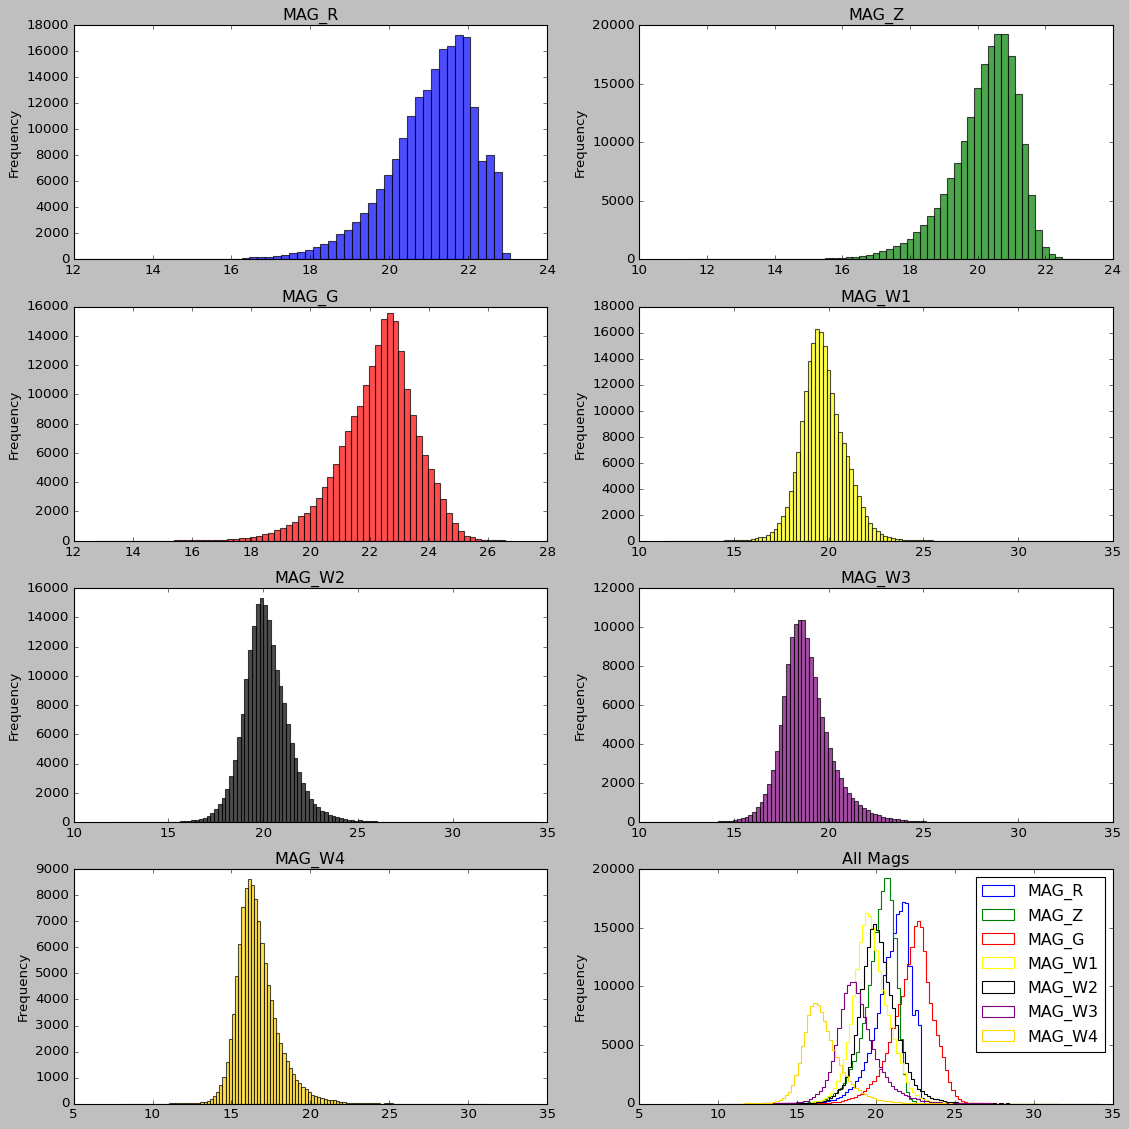

In [5]:
data = cat_table
### MAG PLOTS
BANDS = ["R", "Z", "G", "W1", "W2", "W3", "W4"]
mags = ['MAG_'+band for band in BANDS]
key_list = mags 
color_list = ['blue', 'green', 'red', 'yellow', 'black', "purple", "gold"]
hor = 2
ver = 4

plt.style.use('classic') # style of the plots
# ver 'https://www.geeksforgeeks.org/style-plots-using-matplotlib/'

fig = plt.figure(figsize=(14, 14), constrained_layout=True) # Create a new figure, or activate an existing figure. figsize = Width, height in inches. constrained_layout: The layout mechanism for positioning of plot elements to avoid overlapping.
gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05) # A grid layout to place subplots within a figure. The location of the grid cells is determined in a similar way to SubplotParams using left, right, top, bottom, wspace and hspace.
# nrows = ver, ncols = hor (number of rows and columns). wspace: The amount of width reserved for space between subplots, expressed as a fraction of the average axis width.
# Extent of the subplots as a fraction of figure width or height. Left cannot be larger than right, and bottom cannot be larger than top.
# ver 'https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure'
# ver 'https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec'
# ver 'https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html'

i=0
binsize=0.2
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize) # Return evenly spaced values within a given interval.
# arange(stop): Values are generated within the half-open interval [0, stop) (in other words, the interval including start but excluding stop).
# arange(start, stop): Values are generated within the half-open interval [start, stop).
# arange(start, stop, step) Values are generated within the half-open interval [start, stop), with spacing between values given by step.
# For integer arguments the function is roughly equivalent to the Python built-in range, but returns an ndarray rather than a range instance.
# When using a non-integer step, such as 0.1, it is often better to use numpy.linspace.
# linspace(start, stop, num): Returns num evenly spaced samples, calculated over the interval [start, stop].
# range(start, stop, step) ou range(n) gera uma lista de 0 a n-1.
# ver 'https://numpy.org/doc/stable/reference/generated/numpy.arange.html', 'https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace', 'https://www.geeksforgeeks.org/python-range-function/'
# nanmin(max): Return minimum (maximum) of an array or minimum (maximum) along an axis, ignoring any NaNs.   


for v in range(ver):
    for h in range(hor):
        if v==(ver-1):
            # faz o plot da ultima row (v==(ver-1)) e primeira coluna
            ax = fig.add_subplot(gs[v, 0])
            bins = binarange(data.field(key_list[i]), binsize)
            ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7)
            ax.set_title(key_list[i])
            
            # faz o plot da ultima row (v==(ver-1)) e segunda coluna
            ax = fig.add_subplot(gs[v, 1])
            for c, key in enumerate(key_list):
                bins = binarange(data.field(key), binsize)
                ax = df[key].plot.hist(bins=bins, color=color_list[c], alpha=1, label=key, histtype='step')
            ax.set_title("All Mags")
            plt.legend()
            
            break # a instrução break oferece a possibilidade de sair de um loop quando uma condição externa é acionada.
            i+=1  # i = i + 1
            
        
        
        mags = ['MAG_'+band for band in BANDS]
        
        # faz os plots das 3 primeiras rows
        ax = fig.add_subplot(gs[v, h]) # Add an ~.axes.Axes to the figure as part of a subplot arrangement. Adiciona os eixos, ticks, legenda de cada subplot na figure.
        bins = binarange(data.field(key_list[i]), binsize) # FIELD element: describes the datatype of a particular column of data. Return column[item] for recarray compatibility. Pegou uma coluna MAG_i dos dados e fez uma lista de binsize em binsize do valor min ao max dessa coluna.
        ax = df[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7) # pega a coluna key_list[i] = MAG_i do dataframe do pandas e faz um histograma com os bins definidos, cor e transparencia alpha.
        # ver 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html'
        ax.set_title(key_list[i]) # faz o título MAG_i
        i+=1

plt.show

# Select Pandas Dataframe mag_g < 22 

In [6]:
rslt_df = df[df['MAG_G'] < 22] # filtrando o dataframe usando condicional, pegando um subset dele.
# ver 'https://towardsdatascience.com/23-efficient-ways-of-subsetting-a-pandas-dataframe-6264b8000a77', 'https://medium.com/codex/10-efficient-ways-for-inspecting-a-pandas-dataframe-object-3f66563e2f2'
# ver 'https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html'
print(rslt_df)

                ra        dec      MAG_R      MAG_G      MAG_Z     MAG_W1  \
2       218.976383  34.626466  18.890739  20.205397  18.109526  18.055065   
3       218.924620  34.625596  20.606371  21.781631  19.691599  19.006557   
4       219.104225  34.625848  20.372391  21.050526  20.042389  20.373194   
9       218.854058  34.629541  20.439299  21.747459  19.725077  19.612200   
14      219.119427  34.632669  17.951214  18.725872  17.421986  17.605015   
...            ...        ...        ...        ...        ...        ...   
203456  221.320375  35.019494  20.778296  21.666706  20.231789  20.391850   
203457  221.314180  35.020159  19.881739  20.459455  19.522923  20.016617   
203461  221.138374  35.021188  20.347160  20.776453  20.086678  20.752996   
203464  221.325672  35.022265  20.660891  21.771286  19.916258  19.032324   
203468  221.372059  35.024040  20.499336  21.271202  20.050690  20.139725   

           MAG_W2     MAG_W3     MAG_W4  MAGErr_R  ...  MAGErr_W1  MAGErr_W

# Mounting your google drive

To mount your google drive:
click in showed link and set your account google get token 

In [7]:
from google.colab import drive
drive.mount('/content/drive') # google drive montado para receber dowload/upload de dados, ver file browser in the side panel.
# ver 'https://colab.research.google.com/notebooks/io.ipynb'

Mounted at /content/drive


# Saving New Catalog with Pandas Dataframe in csv 


(Google Drive)

In [8]:
rslt_df.to_csv('/content/drive/MyDrive/LegacyCatalog.csv', index=False) # ver 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html'


# Loading New Catalog with Pandas Dataframe in csv 

In [9]:
rslt_df = pd.read_csv('/content/drive/MyDrive/LegacyCatalog.csv') # ver 'https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html'
# ver 'https://www.w3schools.com/python/pandas/pandas_csv.asp'
# use df.to_string() to print the entire DataFrame.

# Calculating the signal to noise ratio

In [10]:
SNR = 1 / rslt_df["MAGErr_G"].values # Return a Numpy array representation of the DataFrame. Only the values in the DataFrame will be returned, the axes labels will be removed.
# ver 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html'
# ver 'https://www.geeksforgeeks.org/get-a-list-of-a-particular-column-values-of-a-pandas-dataframe/'
Isnr = np.where(SNR > 5) # returns the indices of elements in an input array where the given condition is satisfied. Quanto maior o SNR (SIGNAL TO NOISE RATIO) melhor a observação, 100 é ideal = 1% mag_error.
# ver 'https://www.geeksforgeeks.org/numpy-where-in-python/'
print(len(Isnr))
print(Isnr) # indices.
print(SNR[Isnr]) # elements.
print(len(SNR)) # len returns the number of items in an object.
print(SNR)
print(rslt_df["MAGErr_G"].values) # erro na magnitude da banda G.

1
(array([    0,     1,     2, ..., 72484, 72485, 72486]),)
[87.08873418 23.11052154 39.66105154 ... 46.87680546 25.16638238
 32.04006819]
72487
[87.08873418 23.11052154 39.66105154 ... 46.87680546 25.16638238
 32.04006819]
[0.01148254 0.04327033 0.02521365 ... 0.02133251 0.03973555 0.03121092]


# Fitting with Seaborn diagram color r-i (axis x) and g-r (axis y) 


            r-i       g-r
0      0.835674  1.314657
1      1.599813  1.175261
2     -0.000803  0.678135
3      0.827099  1.308161
4      0.346199  0.774658
...         ...       ...
72482  0.386446  0.888411
72483 -0.134878  0.577717
72484 -0.405836  0.429293
72485  1.628567  1.110395
72486  0.359612  0.771866

[72487 rows x 2 columns]


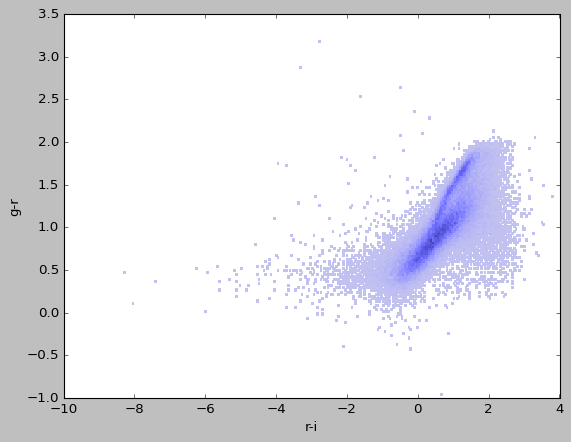

In [11]:
x = rslt_df["MAG_R"].values - rslt_df["MAG_W1"].values # numpy array.
y = rslt_df["MAG_G"].values - rslt_df["MAG_R"].values

d = {'r-i': x, 'g-r': y} # python dictionary.
# ver 'https://www.w3schools.com/python/python_dictionaries.asp'
# ver 'https://docs.python.org/3/tutorial/datastructures.html' 
dfplot = pd.DataFrame(data=d) # dictionary to dataframe.
print(dfplot)
#seaborn.scatterplot(data=dfplot, x="r-i", y="g-r") # ver 'https://seaborn.pydata.org/generated/seaborn.scatterplot.html'
seaborn.histplot(data=dfplot, x="r-i", y="g-r") # ver 'https://seaborn.pydata.org/generated/seaborn.histplot.html', 2d histogram.

# Plot with seaborn a histogram of the redshifts and save in your google drive

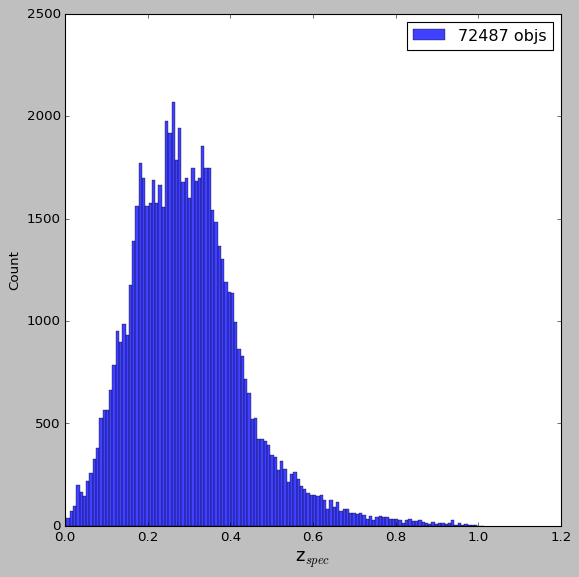

In [12]:
fig = plt.figure(figsize=(8,8))
ax = seaborn.histplot(data=rslt_df, x="z", label=str(rslt_df.shape[0]) + ' objs') # shape[0] return the first term (rows) in a tuple (rows, columns) representing the dimensionality of the DataFrame.
# ver 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html'
ax.set_xlabel('z$_{spec}$', fontsize=16)
ax.set_ylabel('Count')
plt.legend() # Place a legend on the Axes. ver 'https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html'
plt.savefig('/content/drive/MyDrive/PlotZ_Legacy.png') # salva o plot no google drive que a gente montou.


In [13]:
print("######## List files in local google colab:")
!ls 
print("******** List files in your google drive:")
!ls drive/MyDrive/ 


######## List files in local google colab:
drive  legacy_dr8_class.fits  sample_data
******** List files in your google drive:
 Array_MAGR.npy
 artigos_bibliografia.zip
'astronomia e astrofisica.pdf'
'Cálculo Diferencial e Integral de Funções de Várias Variáveis_Diomara Pinto e Maria Cândida F. Morgado_3ªEd.pdf'
 calculo-james-stewart-7-volume-2.pdf
'Carroll B.W., Ostlie D.A. An introduction to modern astrophysics  2007.djvu'
 Classroom
'Colab Notebooks'
 Comprovante_biblioteca.pdf
'Comprovante de entrega de versão final da Monografia Eduardo da Costa Valadão (1).docx'
'Comprovante de entrega de versão final da Monografia Eduardo da Costa Valadão_assinado_Biblioteca.pdf'
'Comprovante de entrega de versão final da Monografia Eduardo da Costa Valadão.docx'
'Cópia de Ata Eduardo da Costa Valadão 2021.2(1).pdf'
'Cópia de Ata Eduardo da Costa Valadão 2021.2.pdf'
'Cópia de Formulário para Defesa de Monografia.docx'
'documento 3.pptx'
 EDUARDOVALADAOCERTIFICADO.pdf
 Experime

# Exercício: Create a new column from a fits catalog and save the new catalog.


            r-i       g-r       g-z       r-z
0      0.835674  1.314657  2.095871  0.781214
1      1.599813  1.175261  2.090033  0.914772
2     -0.000803  0.678135  1.008137  0.330002
3      0.827099  1.308161  2.022383  0.714222
4      0.346199  0.774658  1.303886  0.529228
...         ...       ...       ...       ...
72482  0.386446  0.888411  1.434917  0.546507
72483 -0.134878  0.577717  0.936533  0.358816
72484 -0.405836  0.429293  0.689775  0.260483
72485  1.628567  1.110395  1.855028  0.744633
72486  0.359612  0.771866  1.220512  0.448647

[72487 rows x 4 columns]


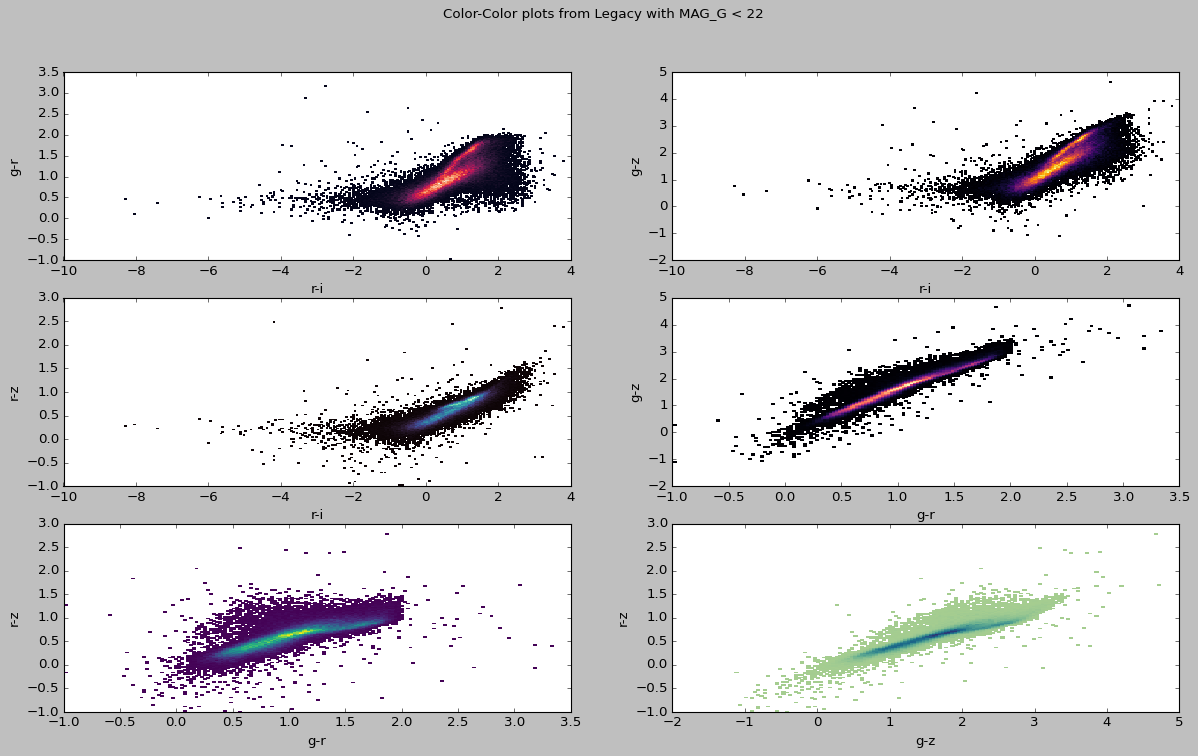

In [14]:
x = rslt_df["MAG_R"].values - rslt_df["MAG_W1"].values # numpy array.
y = rslt_df["MAG_G"].values - rslt_df["MAG_R"].values
z = rslt_df["MAG_G"].values - rslt_df["MAG_Z"].values # new color in array form
h = rslt_df["MAG_R"].values - rslt_df["MAG_Z"].values # new color in array form

d = {'r-i': x, 'g-r': y, 'g-z': z, 'r-z': h} # dictionary of colors
dfplot = pd.DataFrame(data=d) # dictionary to dataframe.
print(dfplot) 

# color-color plots, colors (difference of magnitudes in different bands) doesn't depend on distances, directly related to a star temperature (HR diagram).
fig, axes = plt.subplots(3, 2, figsize=(18, 10)) # ver 'https://www.geeksforgeeks.org/multi-plot-grid-in-seaborn/'
 
fig.suptitle('Color-Color plots from Legacy with MAG_G < 22')

palette1 = "rocket" # ver 'https://seaborn.pydata.org/tutorial/color_palettes.html'
palette2 = "inferno"
palette3 = "mako"
palette4 = "magma"
palette5 = "viridis"
palette6 = "crest"

seaborn.histplot(ax=axes[0, 0], data=dfplot[["r-i","g-r"]], x="r-i", y="g-r", cmap = palette1) # ver 'https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html'
seaborn.histplot(ax=axes[0, 1], data=dfplot[["r-i","g-z"]], x="r-i", y="g-z", cmap = palette2) # ver 'https://seaborn.pydata.org/generated/seaborn.histplot.html'
seaborn.histplot(ax=axes[1, 0], data=dfplot[["r-i","r-z"]], x="r-i", y="r-z", cmap = palette3)
seaborn.histplot(ax=axes[1, 1], data=dfplot[["g-r","g-z"]], x="g-r", y="g-z", cmap = palette4)
seaborn.histplot(ax=axes[2, 0], data=dfplot[["g-r","r-z"]], x="g-r", y="r-z", cmap = palette5)
seaborn.histplot(ax=axes[2, 1], data=dfplot[["g-z","r-z"]], x="g-z", y="r-z", cmap = palette6) 

plt.savefig('/content/drive/MyDrive/Plotscolorcolor_Legacy.png')


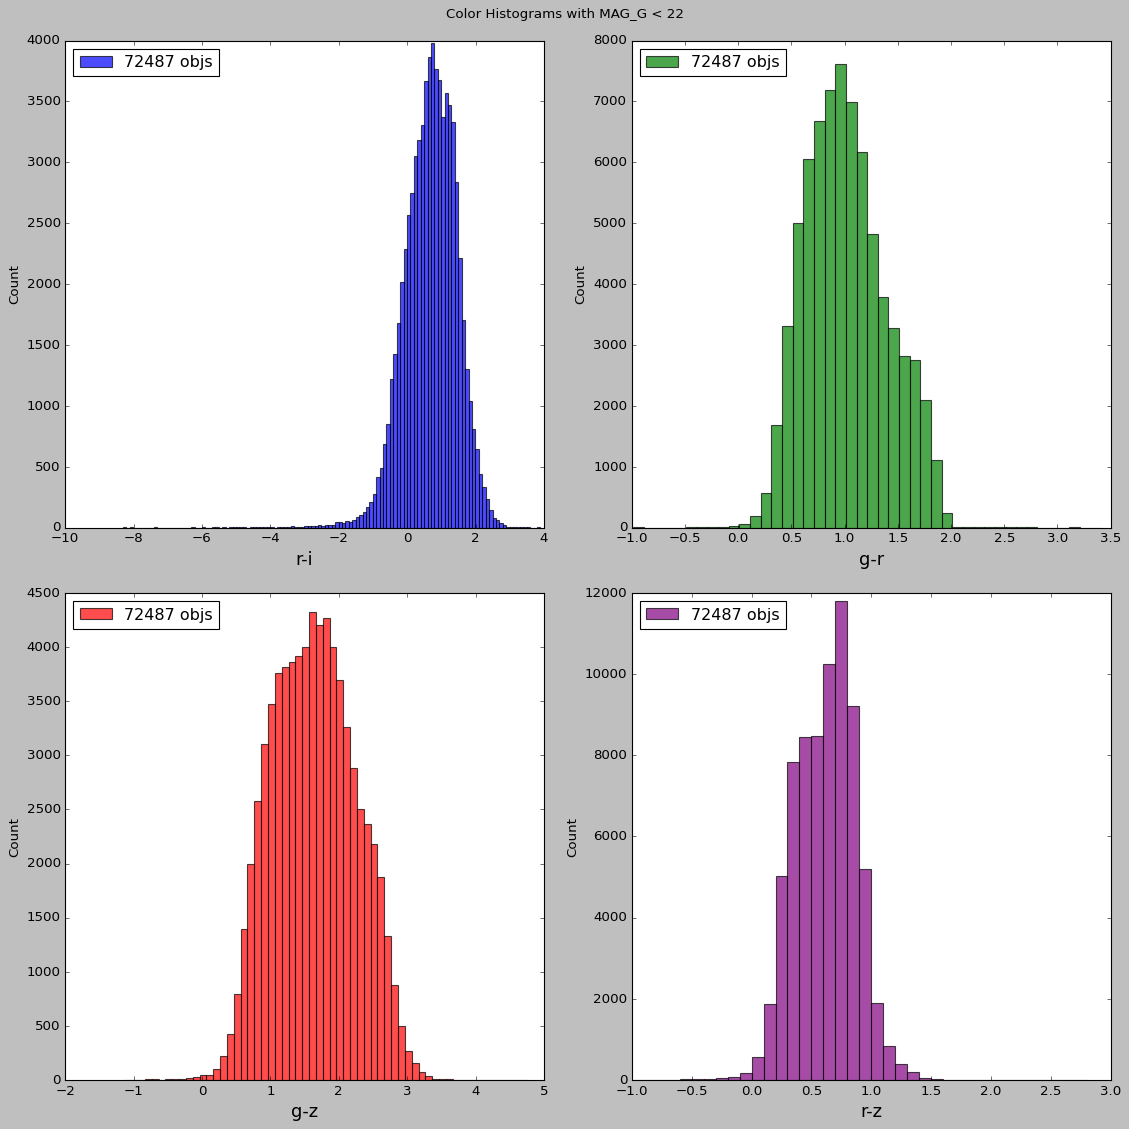

In [15]:
### MAG PLOTS
dftable = Table.from_pandas(dfplot) # ver 'https://docs.astropy.org/en/stable/table/pandas.html'
COLORS = ["r-i", "g-r", "g-z", "r-z"]
key_list = COLORS
color_list = ['blue', 'green', 'red', "purple"]
hor = 2
ver = 2

plt.style.use('classic') # style of the plots

fig = plt.figure(figsize=(14, 14), constrained_layout=True) # Create a new figure, or activate an existing figure. figsize = Width, height in inches. constrained_layout: The layout mechanism for positioning of plot elements to avoid overlapping.
gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05) # A grid layout to place subplots within a figure. The location of the grid cells is determined in a similar way to SubplotParams using left, right, top, bottom, wspace and hspace.
fig.suptitle('Color Histograms with MAG_G < 22')

i=0
binsize=0.1
def binarange(arr, binsize):
    return np.arange(np.nanmin(arr), np.nanmax(arr)+binsize, binsize) # Return evenly spaced values within a given interval. 

for v in range(ver):
    for h in range(hor):
        ax = fig.add_subplot(gs[v, h]) # Add an ~.axes.Axes to the figure as part of a subplot arrangement. Adiciona os eixos, ticks, legenda de cada subplot na figure.
        bins = binarange(dftable.field(key_list[i]), binsize) # FIELD element: describes the datatype of a particular column of data. Return column[item] for recarray compatibility. Pegou uma coluna MAG_i dos dados e fez uma lista de binsize em binsize do valor min ao max dessa coluna.
        ax = dfplot[key_list[i]].plot.hist(bins=bins, color=color_list[i], alpha=0.7, label=str(rslt_df.shape[0]) + ' objs') # pega a coluna key_list[i] = MAG_i do dataframe do pandas e faz um histograma com os bins definidos, cor e transparencia alpha.
        ax.set_xlabel(str(key_list[i]), fontsize=16)
        ax.set_ylabel('Count')
        plt.legend(loc='upper left')
        i+=1

plt.show
plt.savefig('/content/drive/MyDrive/Histogramscolorcolor_Legacy.png')

# Adding columns to a dataframe in pandas and saving it to csv:

In [16]:
df_final = rslt_df.join(dfplot) # ver 'https://www.geeksforgeeks.org/how-to-add-column-from-another-dataframe-in-pandas/'
# ver 'https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/'

df_final.to_csv('/content/drive/MyDrive/LegacyCatalog_exerc1.csv', index=False)
print(df_final)

               ra        dec      MAG_R      MAG_G      MAG_Z     MAG_W1  \
0      218.976383  34.626466  18.890739  20.205397  18.109526  18.055065   
1      218.924620  34.625596  20.606371  21.781631  19.691599  19.006557   
2      219.104225  34.625848  20.372391  21.050526  20.042389  20.373194   
3      218.854058  34.629541  20.439299  21.747459  19.725077  19.612200   
4      219.119427  34.632669  17.951214  18.725872  17.421986  17.605015   
...           ...        ...        ...        ...        ...        ...   
72482  221.320375  35.019494  20.778296  21.666706  20.231789  20.391850   
72483  221.314180  35.020159  19.881739  20.459455  19.522923  20.016617   
72484  221.138374  35.021188  20.347160  20.776453  20.086678  20.752996   
72485  221.325672  35.022265  20.660891  21.771286  19.916258  19.032324   
72486  221.372059  35.024040  20.499336  21.271202  20.050690  20.139725   

          MAG_W2     MAG_W3     MAG_W4  MAGErr_R  ...         z      zErr  \
0      18.

# Adding columns to a astropy Table and saving it to ACSII:

In [17]:
import astropy.table as aspt
from astropy.io import ascii
new_table = aspt.hstack([cat_table, dftable]) # ver 'https://docs.astropy.org/en/stable/table/operations.html#id6' 

new_table.write('/content/drive/MyDrive/new_table1.ecsv', overwrite=True, serialize_method='data_mask') # ver 'https://docs.astropy.org/en/stable/io/ascii/write.html'
ascii.write(new_table, '/content/drive/MyDrive/new_table2.dat', overwrite=True) # ver 'https://docs.astropy.org/en/stable/table/index.html' 

# ver 'https://docs.astropy.org/en/stable/table/io.html'
# t = Table.read('photometry.dat', format='ascii.daophot')

cols = new_table.columns
print(cols)
print(new_table.info)
print(new_table)

<TableColumns names=('ra','dec','MAG_R','MAG_G','MAG_Z','MAG_W1','MAG_W2','MAG_W3','MAG_W4','MAGErr_R','MAGErr_G','MAGErr_Z','MAGErr_W1','MAGErr_W2','MAGErr_W3','MAGErr_W4','z','zErr','zmin','zmax','z_spec','training','r-i','g-r','g-z','r-z')>
<Table length=203484>
   name    dtype     class     n_bad 
--------- ------- ------------ ------
       ra float64       Column      0
      dec float64       Column      0
    MAG_R float64       Column      0
    MAG_G float64       Column      0
    MAG_Z float64       Column      0
   MAG_W1 float64       Column   1584
   MAG_W2 float64       Column   8054
   MAG_W3 float64       Column  65512
   MAG_W4 float64       Column  94143
 MAGErr_R float64       Column      0
 MAGErr_G float64       Column      0
 MAGErr_Z float64       Column      0
MAGErr_W1 float64       Column      0
MAGErr_W2 float64       Column      0
MAGErr_W3 float64       Column      0
MAGErr_W4 float64       Column      0
        z float64       Column      0
     zErr fl

## Resumo de Pandas (DataFrame operations): 

In [ ]:
persons = pd.read_csv("persons.csv") # lê arquivo csv como pandas dataframe.
persons 

addresses = pd.read_csv("addresses.csv")
addresses = addresses.set_index("name") # coloca os objetos da coluna name como índices para cada row de addresses.
addresses 

persons2 = pd.read_csv("persons2.csv")

# Projection
persons[["age","height"]] # constrói um dataframe novo com as colunas age e height somente.

# Filtering
persons[persons["age"] > 21] # constrói um data frame novo só com rows em que os objetos de age sejam maior que 21.

# Join 
df = persons.join(addresses, on="name")  # junta a coluna addresses ao dataframe persons de acordo com o name em persons e os índices (name tbm) em addresses, i.e. o address Frankfurt com índice Alice se junta ao row em persons com Alice na coluna name.
# ver 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html'
df 

# Concatenate
pd.concat([persons, persons2]) # concatena as tabelas, i.e. o novo dataframe tem primeiras rows de persons e depois tem-se rows de persons2.

# Agregation
df = pd.read_csv(os.path.join(basedir, "cases_covid.csv")) # ver 'https://www.geeksforgeeks.org/python-os-path-join-method/'
df.head() # retorna as 5 primeiras rows, ver 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html'
# Project to case numbers
covid_cases = df[df.columns[4:]] # dataframe sem as 4 primeiras colunas.
# Calculate new cases by differencing
covid_new_cases = covid_cases.diff(axis=1) # faz a diferença entre um elemento de uma coluna e de uma outra coluna anterior, ver 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html'.
# Calculate average increase
covid_new_cases_avg = covid_new_cases.mean(axis=1) # retorna a média dos elementos de uma coluna, ver 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html'.
# Create new dataframe with state/country columns
pd.concat([df[df.columns[:4]], covid_new_cases_avg], axis=1)


In [18]:
# Import pandas package
import pandas as pd
  
# Define a dictionary containing Students data
data = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'],
        'Height': [5.1, 6.2, 5.1, 5.2],
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']}
  
# Convert the dictionary into DataFrame
df = pd.DataFrame(data)
  
# Declare a list that is to be converted into a column
address = ['Delhi', 'Bangalore', 'Chennai', 'Patna']
  
# Using 'Address' as the column name
# and equating it to the list
df['Address'] = address
  
# Observe the result
df
#print(df) 

# ver 'https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/'.

,Name,Height,Qualification,Address
0,Jai,5.1,Msc,Delhi
1,Princi,6.2,MA,Bangalore
2,Gaurav,5.1,Msc,Chennai
3,Anuj,5.2,Msc,Patna
